In [108]:
import tensorflow_datasets as tfds


import main

dataset, info = tfds.load('mnist',split='train[:10%]',with_info=True)

In [114]:
import e
import importlib
import numpy as np
importlib.reload(main)
#inp, out = e.to_ndarray(dataset)
inp = np.reshape([np.array(el['image']) for el in dataset],(-1,28,28,1))
    
out = np.reshape([np.array(el['label'].numpy()) for el in dataset], (-1, 1))
print(len(inp))

tsize = 30
testi = inp[-30:]
testo = out[-30:]
inp = inp[:-30]
out = out[:-30]

6000


In [115]:
import layers
importlib.reload(layers)

<module 'layers' from '/Users/sawyer/PycharmProjects/MLLib/layers.py'>

In [116]:
l = layers.conv((28,28),padb=True,channels=(1,32))
n = l.append(layers.dense(10,activation=main.layer.SOFTMAX))

In [117]:
m = main.model(l,cost=main.model.CROSS,learningRate=.05)

In [118]:
costs = m.train(inp,out,numIterations=10)
print(costs)


[17912.24937542795, 26328.219341199358, 20783.04854076093, 20423.413849478973, 9537.20727583624, 19204.964624832817, 23880.126469975366, 23358.549780364956, 18604.716568909553, 13870.081763204991, 11831.779239496573, 11416.59680965793, 11113.078460316605, 9844.132613873287, 8409.91952047984, 7594.327146675323, 7188.010260949055, 7161.521911578008, 6920.988632170433, 6465.313564836809, 6264.809016054703, 6168.870380388977, 6059.15069836052, 5968.237224905318, 5917.500193498915, 5911.35031361485, 5828.944349048847, 5755.925193394749, 5700.3948134387065, 5668.880483615818, 5583.392244709999, 5494.950087811091, 5394.663698642567, 5268.781763305196, 5117.57707297233, 4955.061157652954, 4799.6540267658165, 4662.993049766087, 4549.29159243592, 4459.179217068327, 4387.316472091022, 4324.236873382553, 4262.015882033729, 4203.2346627371535, 4153.3021317263665, 4109.911985722407, 4069.881688264896, 4027.519384060742, 3971.852596344046, 3919.371538843697, 3876.0780501968948, 3842.162632700415, 381

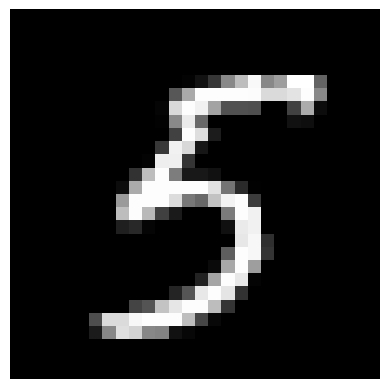

Actual: [5]
[(0, 1.3301894620670486e-11), (1, 5.496953241651995e-09), (2, 2.1615898602549596e-18), (3, 0.0005259048863689585), (4, 1.1443174028661054e-10), (5, 0.9994718108320493), (6, 2.759986969965112e-10), (7, 4.87121458547634e-14), (8, 2.2747660025600738e-06), (9, 3.6148451022744484e-09)]


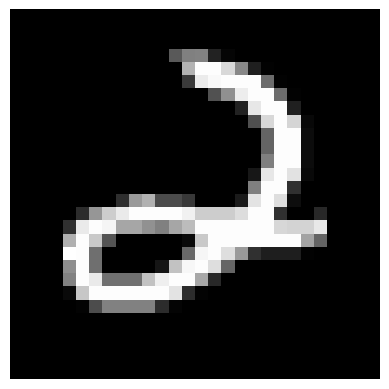

Actual: [2]
[(0, 5.019084568359914e-13), (1, 9.613170254556559e-21), (2, 0.9999999997781199), (3, 2.171496538650608e-10), (4, 2.002522575243913e-12), (5, 3.333542800026754e-19), (6, 2.1632008557051875e-12), (7, 6.288737318343856e-14), (8, 1.0351943494440316e-26), (9, 3.1327910062317267e-21)]


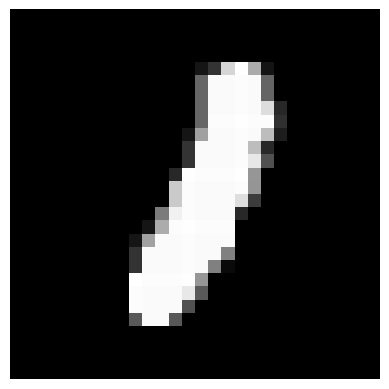

Actual: [1]
[(0, 3.116852032533587e-16), (1, 0.09040716972956642), (2, 0.9095760343102548), (3, 3.4112864921570373e-06), (4, 1.051816890513294e-13), (5, 4.078371414746057e-23), (6, 7.965464529488178e-14), (7, 2.2617091548107186e-11), (8, 1.338464791304898e-05), (9, 2.9710728549380076e-12)]


In [119]:
import matplotlib.pyplot as plt
import numpy as np
pred = m.predict(testi)
pred = [[(i, v) for i, v in enumerate(ex)] for ex in pred]
s = 4
tsize = 3
for i in range(s,tsize+s):
    image = np.reshape(testi[i],(28,28))
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()
    print(f'Actual: {testo[i]}')
    print(pred[i])

In [127]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers as l

mo = models.Sequential()
mo.add(l.Conv2D(filters=1,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu'))
mo.add(l.Flatten())
mo.add(l.Dense(10,activation='softmax'))
mo.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

mo.summary()
n = 10
ex = np.shape(out)[0]
output = np.zeros((ex, n))
for i in range(ex):
        output[i, out[i][0]] = 1
history = mo.fit(inp,output,epochs=60)
history.history

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,860 (30.70 KB)

 Trainable params: 7,860 (30.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5604 - loss: 89.0770
Epoch 2/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 12.8611
Epoch 3/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8575 - loss: 7.9364
Epoch 4/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 5.1988
Epoch 5/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 4.0412
Epoch 6/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8926 - loss: 2.3322
Epoch 7/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 1.9760
Epoch 8/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8939 - loss: 1.3095
Epoch 9/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8904 - loss: 0.9825
Epoch 10/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.6069
Epoch 11/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 0.4944
Epoch 12/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

{'accuracy': [0.7107202410697937,
  0.8418760299682617,
  0.864824116230011,
  0.8725293278694153,
  0.8721942901611328,
  0.8834170699119568,
  0.8822445273399353,
  0.888107180595398,
  0.8969849348068237,
  0.9021775722503662,
  0.9128978252410889,
  0.9160804152488708,
  0.9278057217597961,
  0.9375209212303162,
  0.9375209212303162,
  0.9343383312225342,
  0.9385259747505188,
  0.9388609528541565,
  0.9403685331344604,
  0.9375209212303162,
  0.9410385489463806,
  0.9398660063743591,
  0.9395309686660767,
  0.939195990562439,
  0.936850905418396,
  0.939195990562439,
  0.9370184540748596,
  0.9358459115028381,
  0.9390285015106201,
  0.9417085647583008,
  0.9386934638023376,
  0.9398660063743591,
  0.9361808896064758,
  0.9329982995986938,
  0.9413735270500183,
  0.9373534321784973,
  0.9407035112380981,
  0.9370184540748596,
  0.94321608543396,
  0.940033495426178,
  0.944053590297699,
  0.942378580570221,
  0.94807368516922,
  0.944891095161438,
  0.9492462277412415,
  0.9497487

NameError: name 'mo' is not defined